<a href="https://colab.research.google.com/github/Hiji1023/kaggle_curriculum/blob/main/DieTanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA To Prediction**

https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

### 위의 링크 참고해 필사했습니다.

 ### goal : idea how is the workfolw in any predictive modeling problem.


## **Contents of the Notebook:**
Part1: Exploratory Data Analysis(EDA):  

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.  

Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.  

Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Part1: EDA**


1.   analysis of the features
2.   finding any relations or trends considering multiple features



In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [329]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')

In [330]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The **Age, Cabin,Embarked** have null values. try to fix them.  
#### How many Survived?

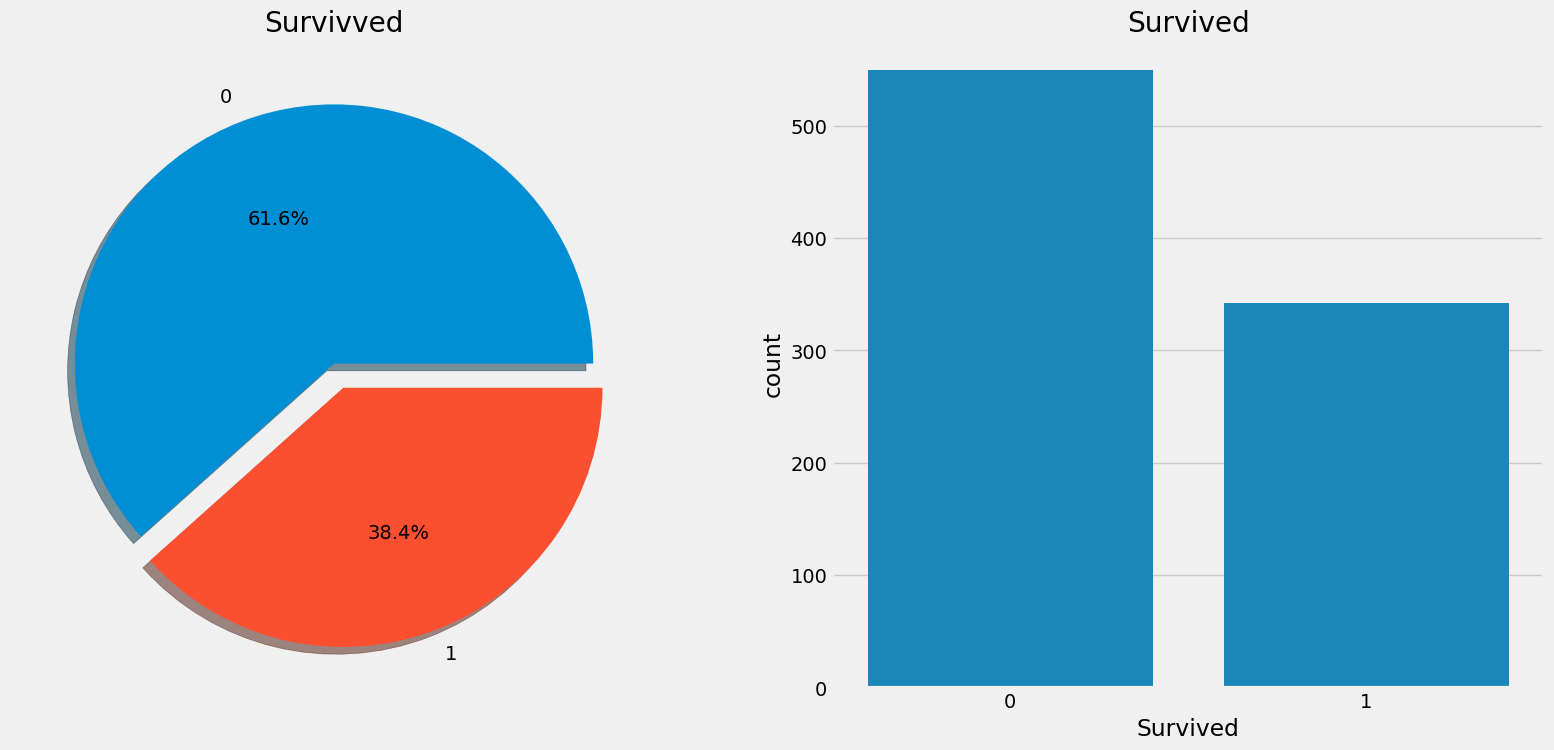

In [332]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survivved')
ax[0].set_ylabel('')

sns.countplot(data=data, x = 'Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

###**Types Of Features**
#####**Categorical Features:**
#####A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

#####**Categorical Features in the dataset: Sex,Embarked.**  
<br/>

#####**Ordinal Features:**
#####An ordinal variable is similar to categorical values, but the difference between them is that we can have **relative ordering or sorting between the values**. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

#####**Ordinal Features in the dataset: PClass**  
<br/>

#####**Continous Feature:**
#####A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

#####**Continous Features in the dataset: Age**

### **Analysing The Features**
<br/>

###**Sex -> Categorical Feature**

In [333]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

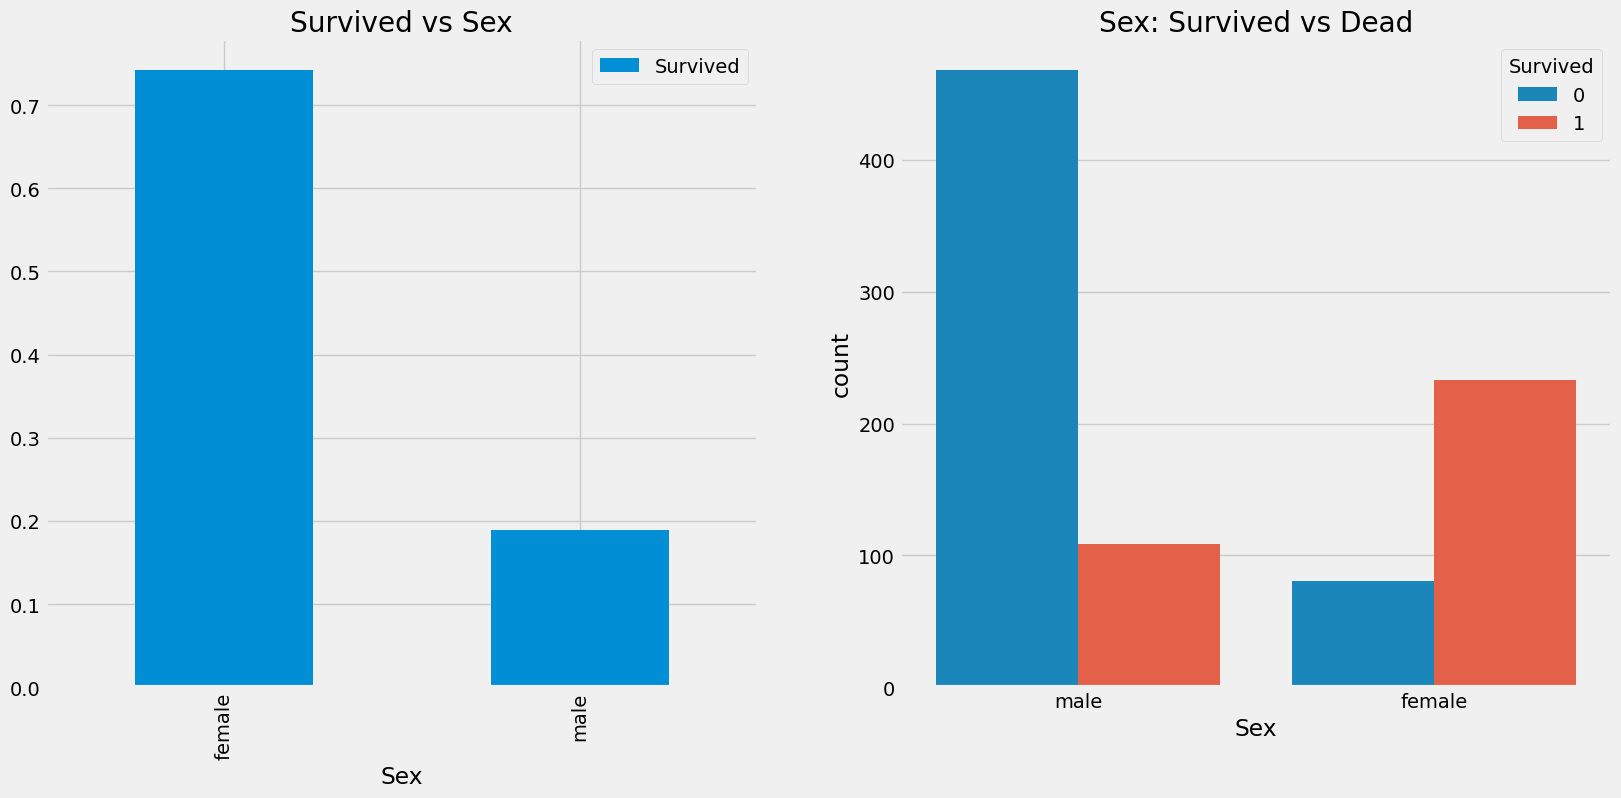

In [334]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x = 'Sex',hue = 'Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 생존율이 남성의 약 3배정도

### **Pclass -> Ordinal Feature**



In [335]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


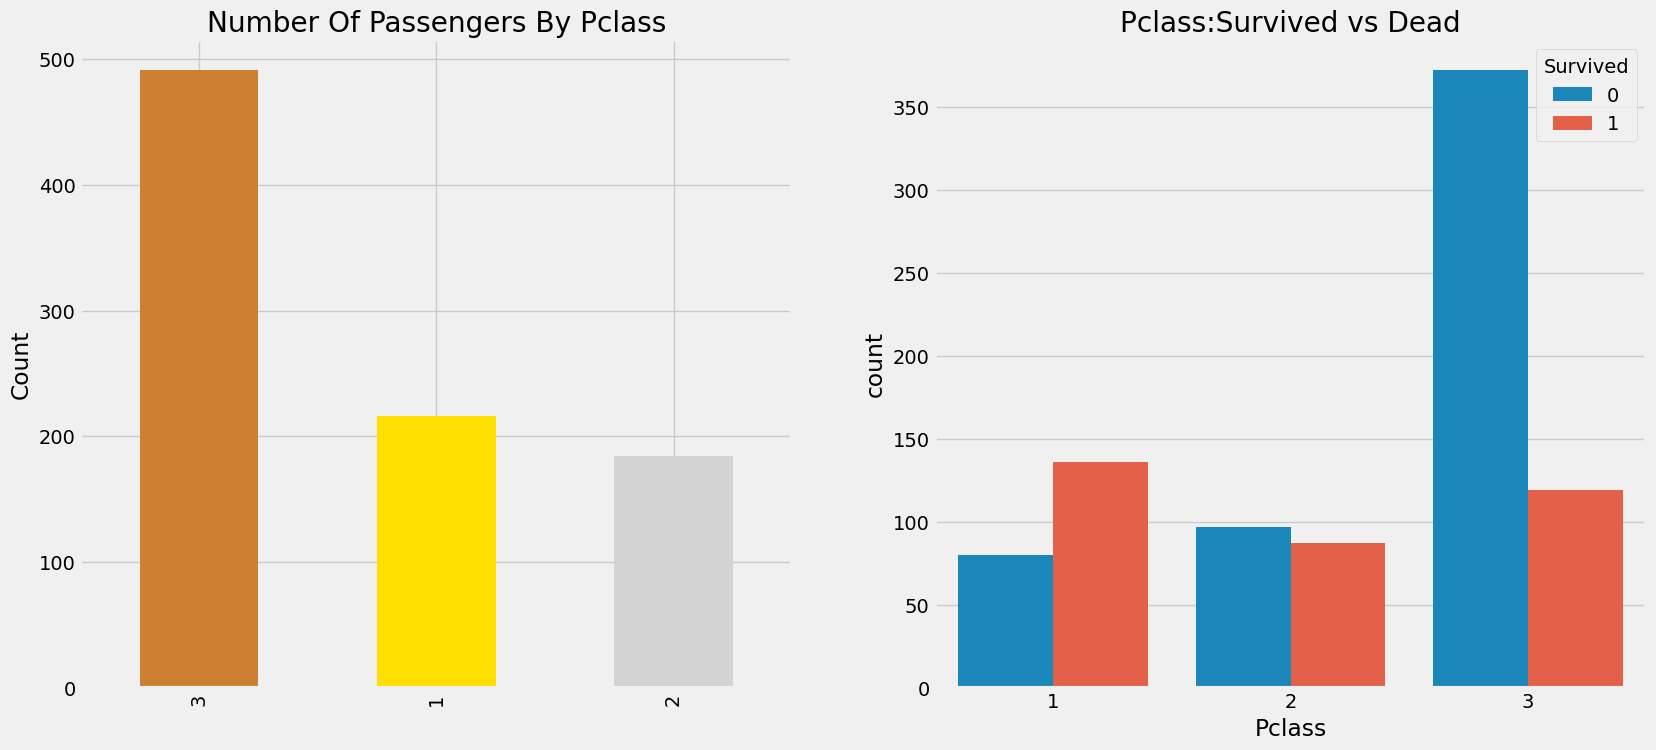

In [336]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(data=data, x='Pclass', hue = 'Survived',ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

p클래스 1이 높은 구조 우선순위였음을 알 수 있다.  
p클래스 3의 승객 수가 2배 넘게 많았음에도 생존율이 p클래스 1보다 낮음을 볼 수 있다.

In [337]:
pd.crosstab([data.Sex,data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

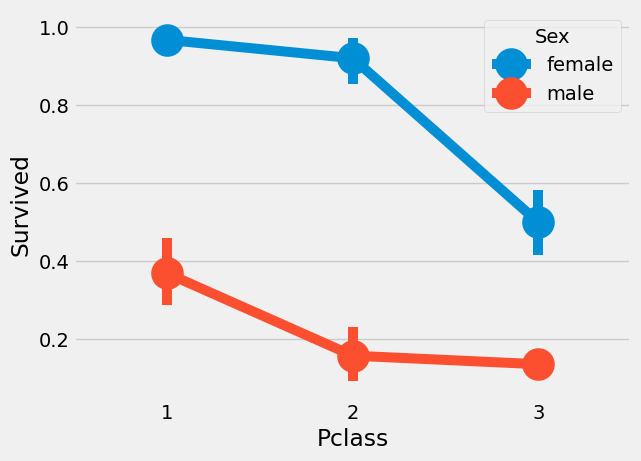

In [338]:
sns.pointplot(data=data,x='Pclass', y='Survived', hue='Sex')
plt.show()

p클래스1의 여성탑승객의 생존율은 약 95%  
  
  p클래스와 상관없이 여성의 생존율이 높은 것을 보아 먼저 구조되었음을 알 수 있다.

###**Age -> Continuous Feature**

In [339]:
print('Oldest Passenger was of :', data["Age"].max(), 'Years')
print('Youngest Passenger was of :', data["Age"].min(), 'Years')
print('Average Age on the ship :', data["Age"].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


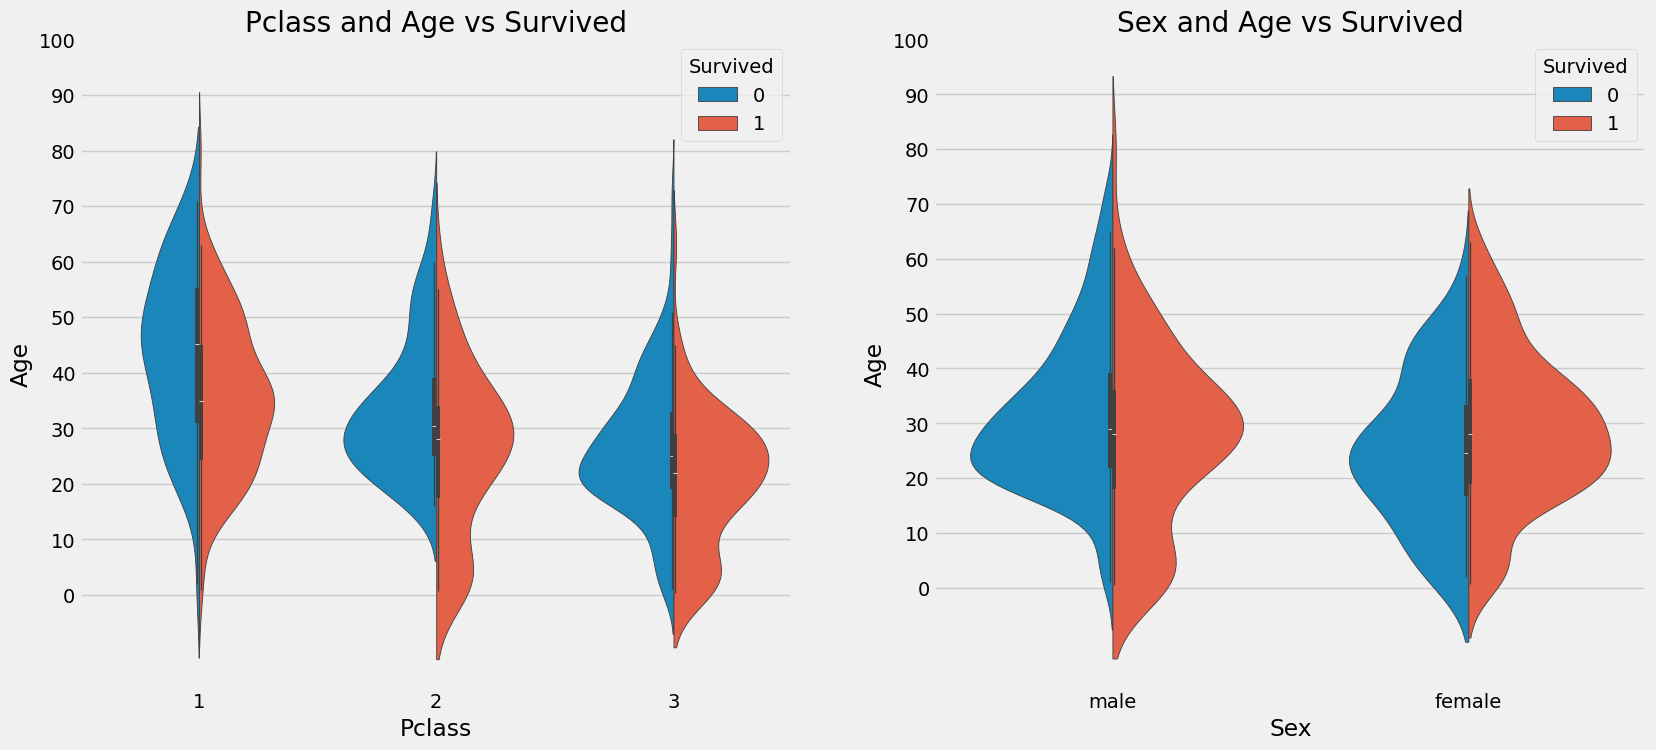

In [340]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot(data=data, x = "Pclass", y = "Age", hue = "Survived", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot(data=data, x = "Sex", y = "Age", hue="Survived", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

1. 어린이의 수는 Pclass에 따라 증가하지만
10세 미만의 승객의 생존율은 Pclass와 관계없이 높다.
2. 남자의 경우 나이가 증가함에 따라 생존율이 감소
3. 20-50세 승객들의 생존 가능성이 높고, 여성은 더욱 높다  
  
age에 177개의 null값이 있다.  
평균으로 채우기엔 나이범위가 매우 넓다  
  
name에서 Mr, Mrs의 평균값을 각 그룹에 할당할 수 있다.


In [341]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

[A-Za-z]+를 사용한다  
A-Z 또는 a-z사이에 있고 a(dot)뒤에 오는 문자열을 찾는다.  
이름에서 이니셜을 추출

In [342]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [343]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [344]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
 ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [345]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

####Filling NaN Ages

In [346]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [347]:
data.Age.isnull().any()

False

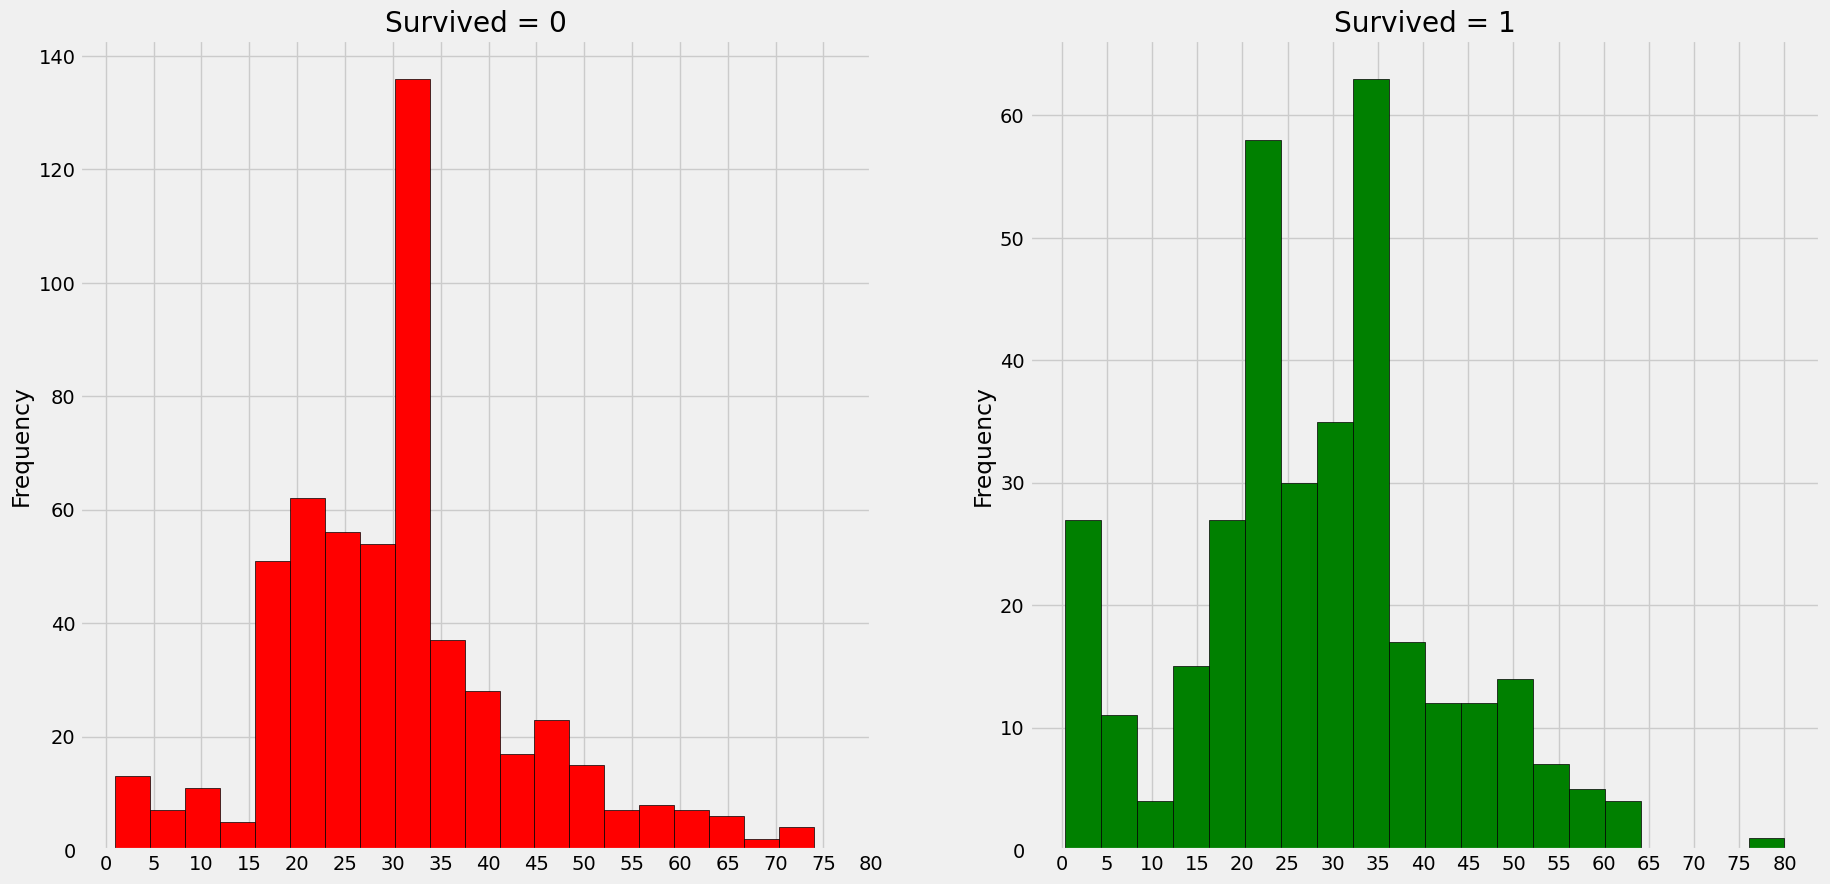

In [348]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20,edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color = 'green', bins = 20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

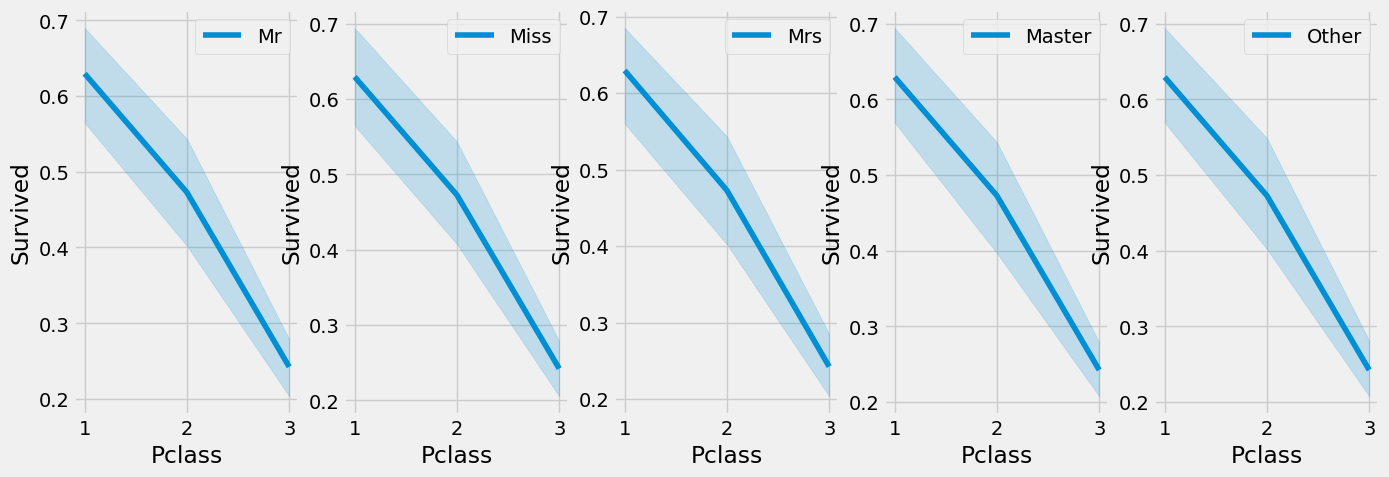

In [349]:
ini = data['Initial'].value_counts().index.tolist()
plt.figure(figsize=(15,5))
for i, col in enumerate(ini[:]):
    plt.subplot(1,5, i+1)
    sns.lineplot(data=data, x = 'Pclass', y = 'Survived', label = str(col))

5세 이하 어린이들은 대부분 생존  
가장 나이 많은 탑승객 생존  
30-40세 그룹이 가장 많은 사망

###**Embarked -> Categorical Value**

In [350]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

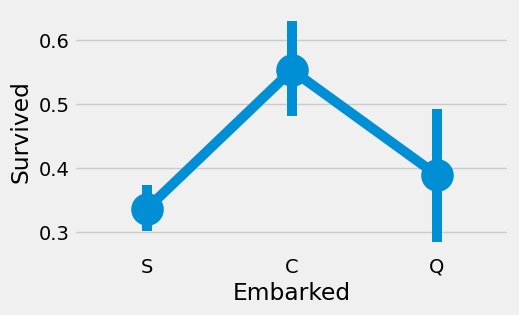

In [351]:
sns.pointplot(data = data, x = 'Embarked', y = 'Survived')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

port C에서의 탑승객 생존율에 제일 높다

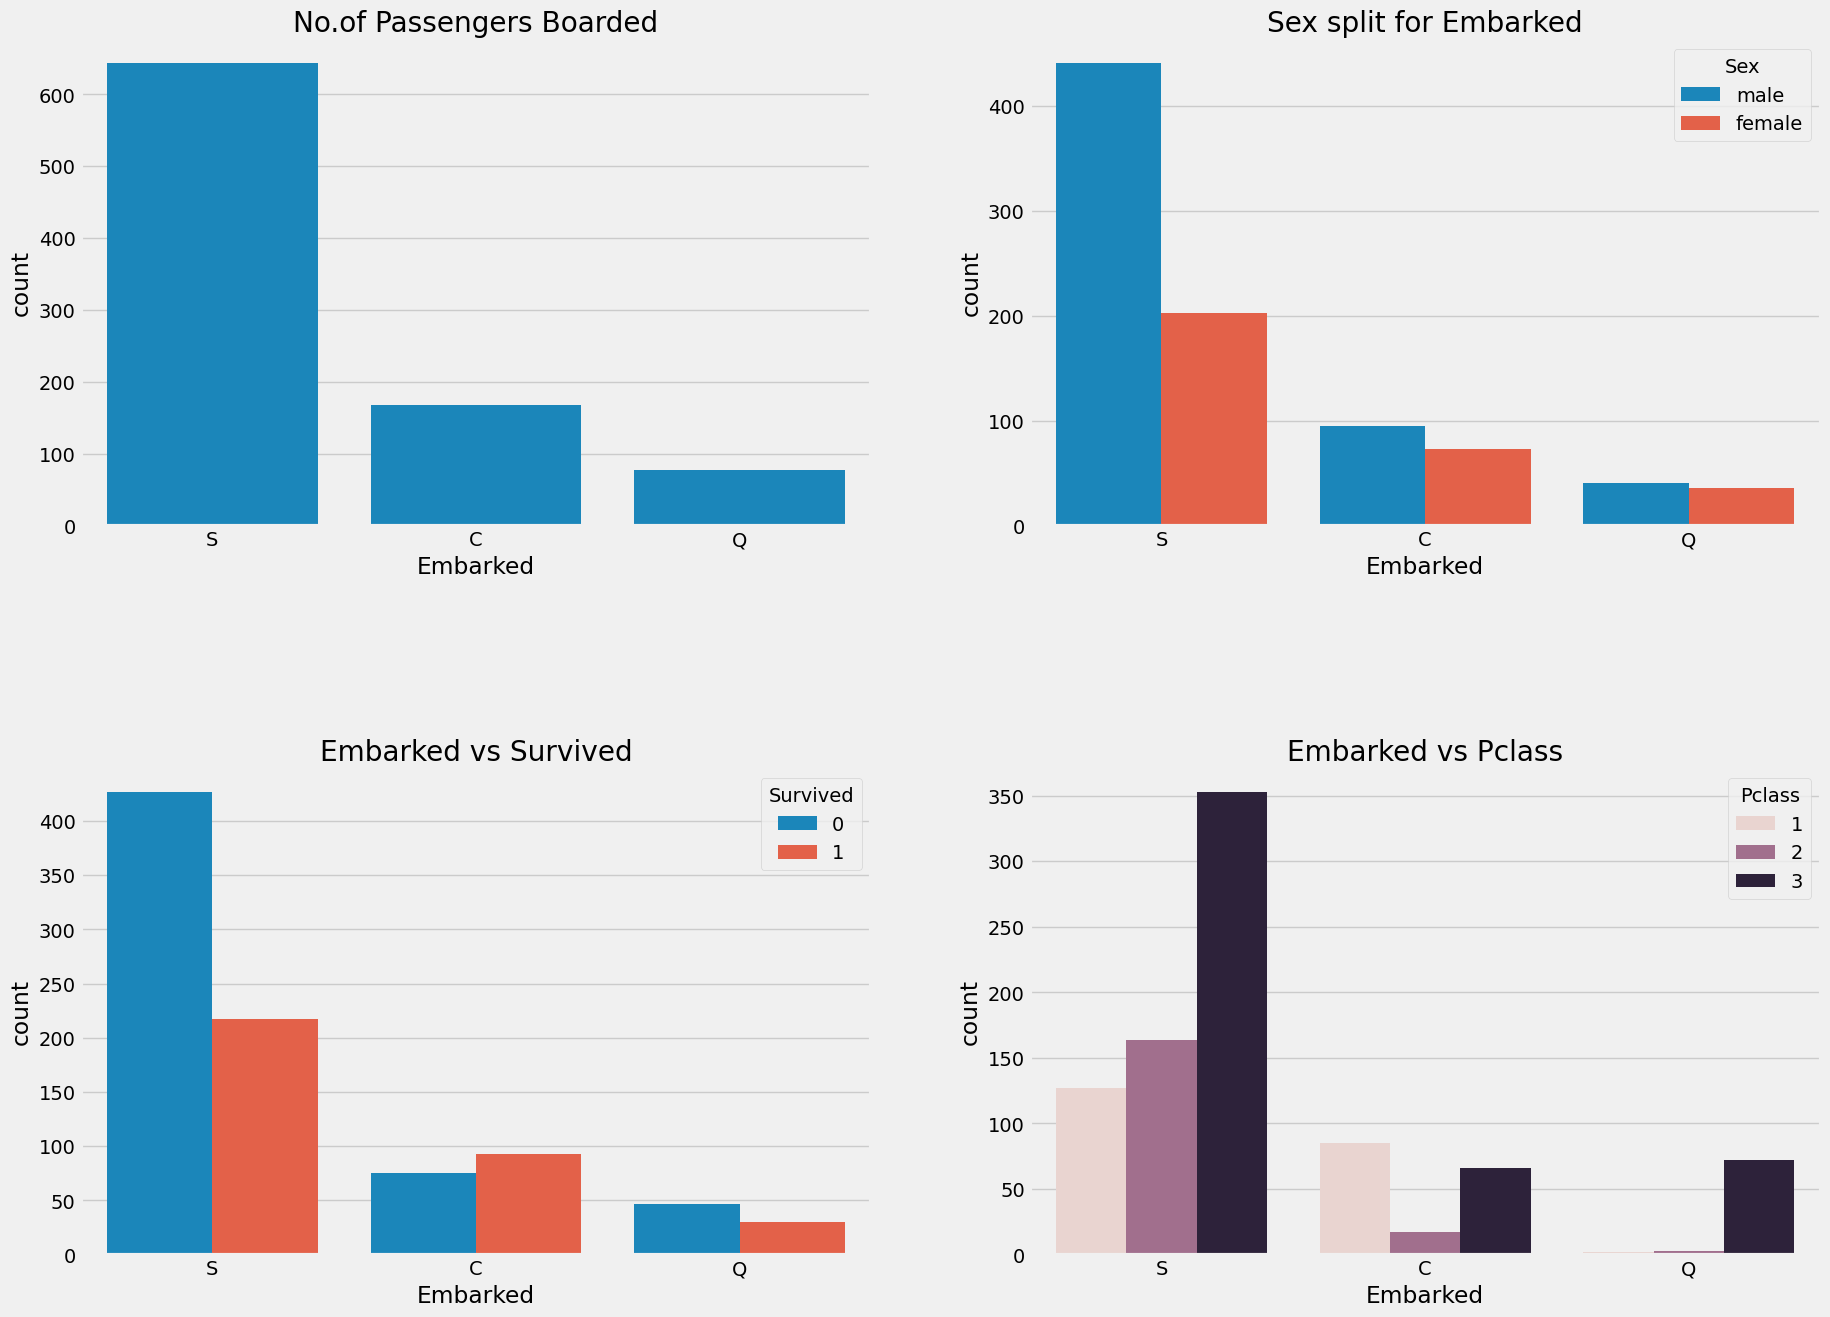

In [352]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x = 'Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No.of Passengers Boarded')
sns.countplot(x = 'Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Sex split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x = 'Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. C의 탑승객의 생존율이 높다 - pclass 1,2  
2. S의 탑승객은 대부분 pclass 3  
3. Q의 탑승객은 거의 95%가 pclass 3
4. S의 탑승객 수가 가장 많다

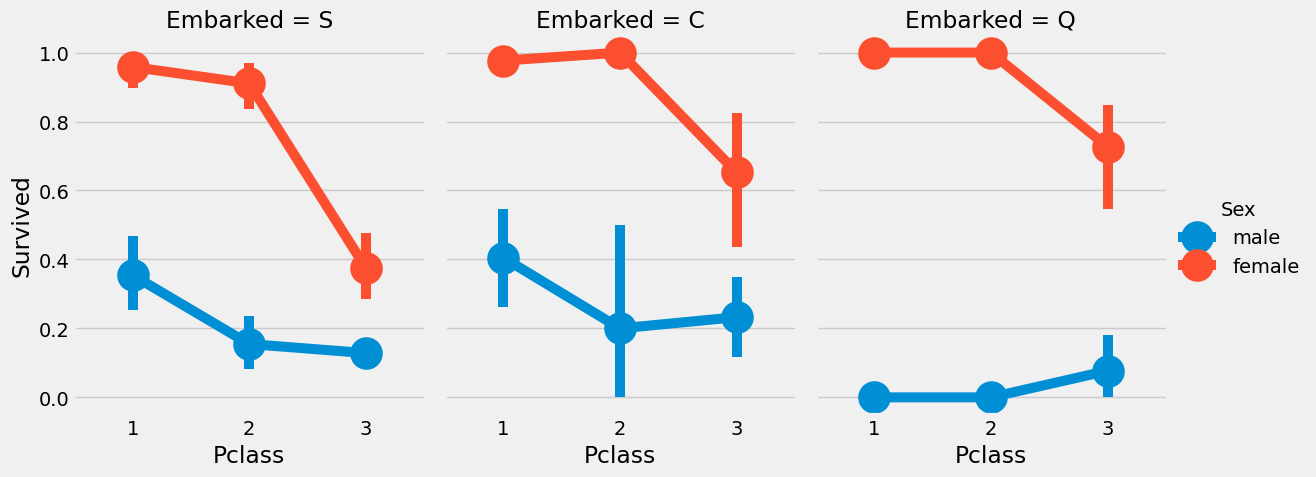

In [353]:
g = sns.FacetGrid(data, col = "Embarked", hue = "Sex", height= 5, aspect=.8)
g.map_dataframe(sns.pointplot, x = "Pclass", y = "Survived")
g.add_legend()

1. Pclass 1,2의 경우 생존율이 1이다.  
2. 포트 S는 생존율이 낮다.  
3. 포트 Q는 대부분 pclass 3로 남자의 생존율이 낮다

#### filling Embarked NaN

In [354]:

data['Embarked'].isnull().sum()

2

In [355]:
data['Embarked'].fillna('S', inplace = True)

In [356]:
data.Embarked.isnull().any()

False

### SibSp -> Discrete Feature


In [357]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

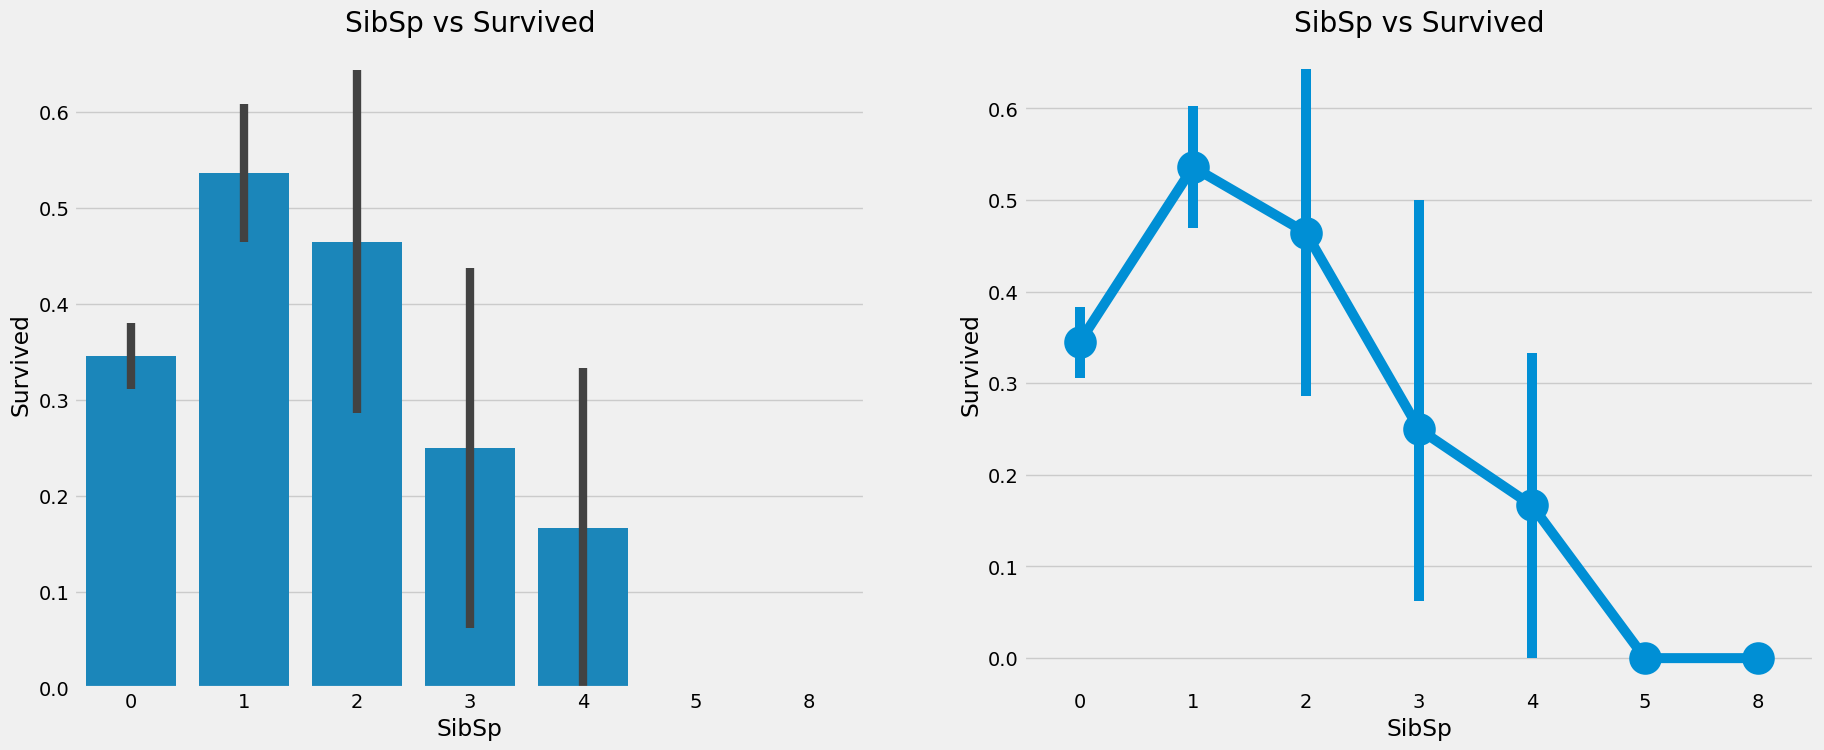

In [358]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot(data = data, x = 'SibSp', y = 'Survived', ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(data=data, x = 'SibSp', y = 'Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')

In [359]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


혼자 탑승한 승객의 생존율은 약 35%  
형제자매가 증가하면 감소  
탑승한 가족이 있다면 그들을 구하려고 노력할 것  
5~8명인 가족의 생존율은 0%  
-> 3명 이상인 사람들은 모두 pclass 3  
대가족은 모두 사망한 것을 알 수 있다

### Parch

In [360]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

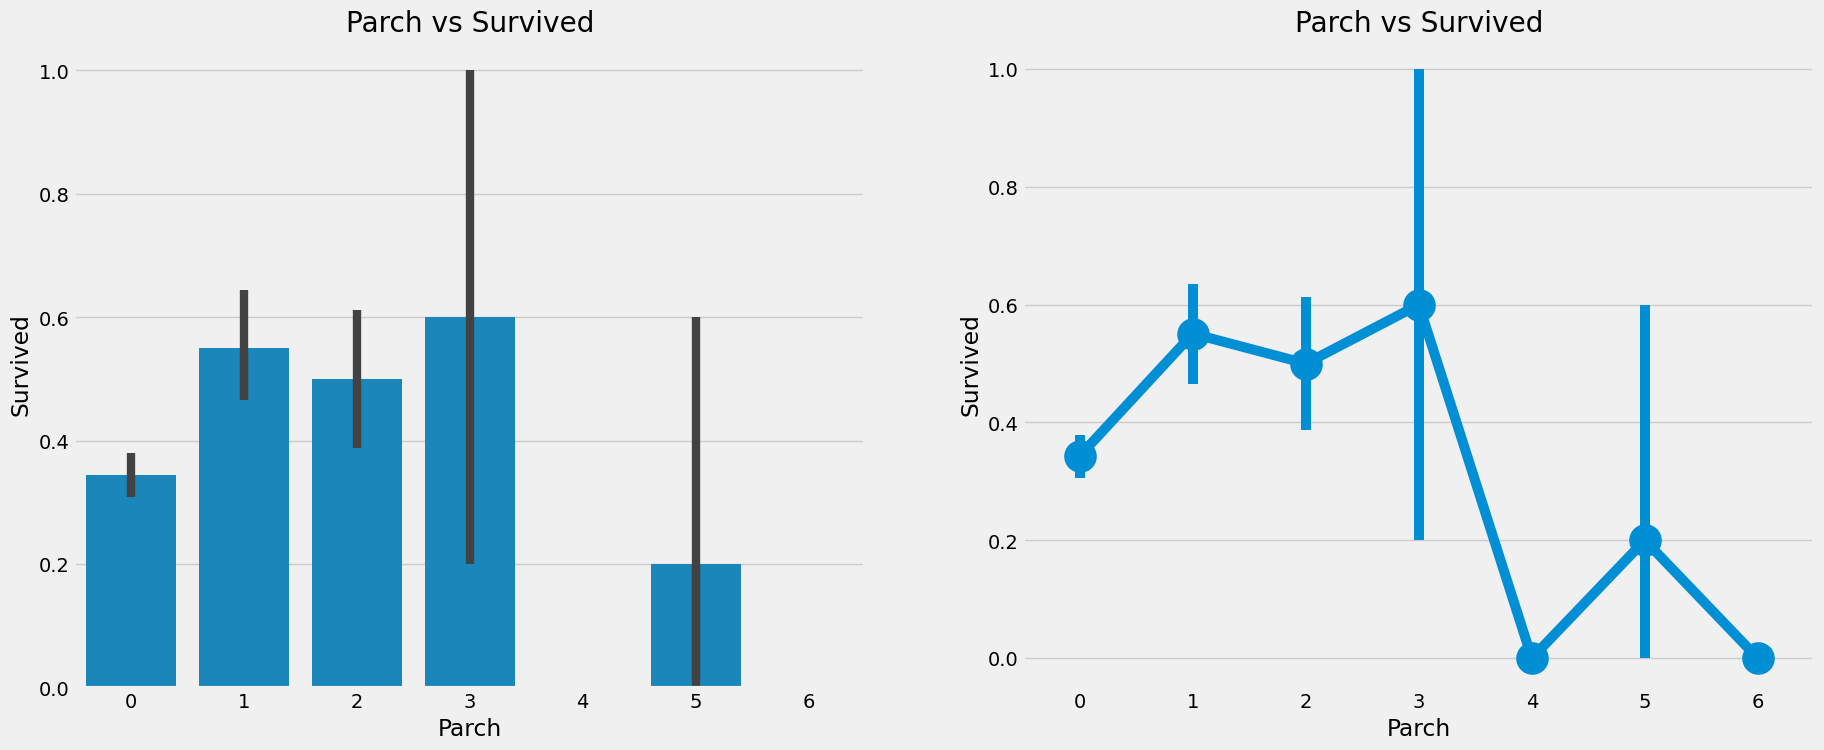

In [361]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot(data = data, x = 'Parch', y = 'Survived', ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=data, x = 'Parch', y = 'Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')

부모님이 탑승한 승객은 생존율이 높다  
그러나 숫자가 올라갈수록 감소  
1~3명의 부모가 있는 승객이 생존율이 좋다  
4명 이상시 생존율 감소

### Fare -> Continuous Faeture

In [362]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


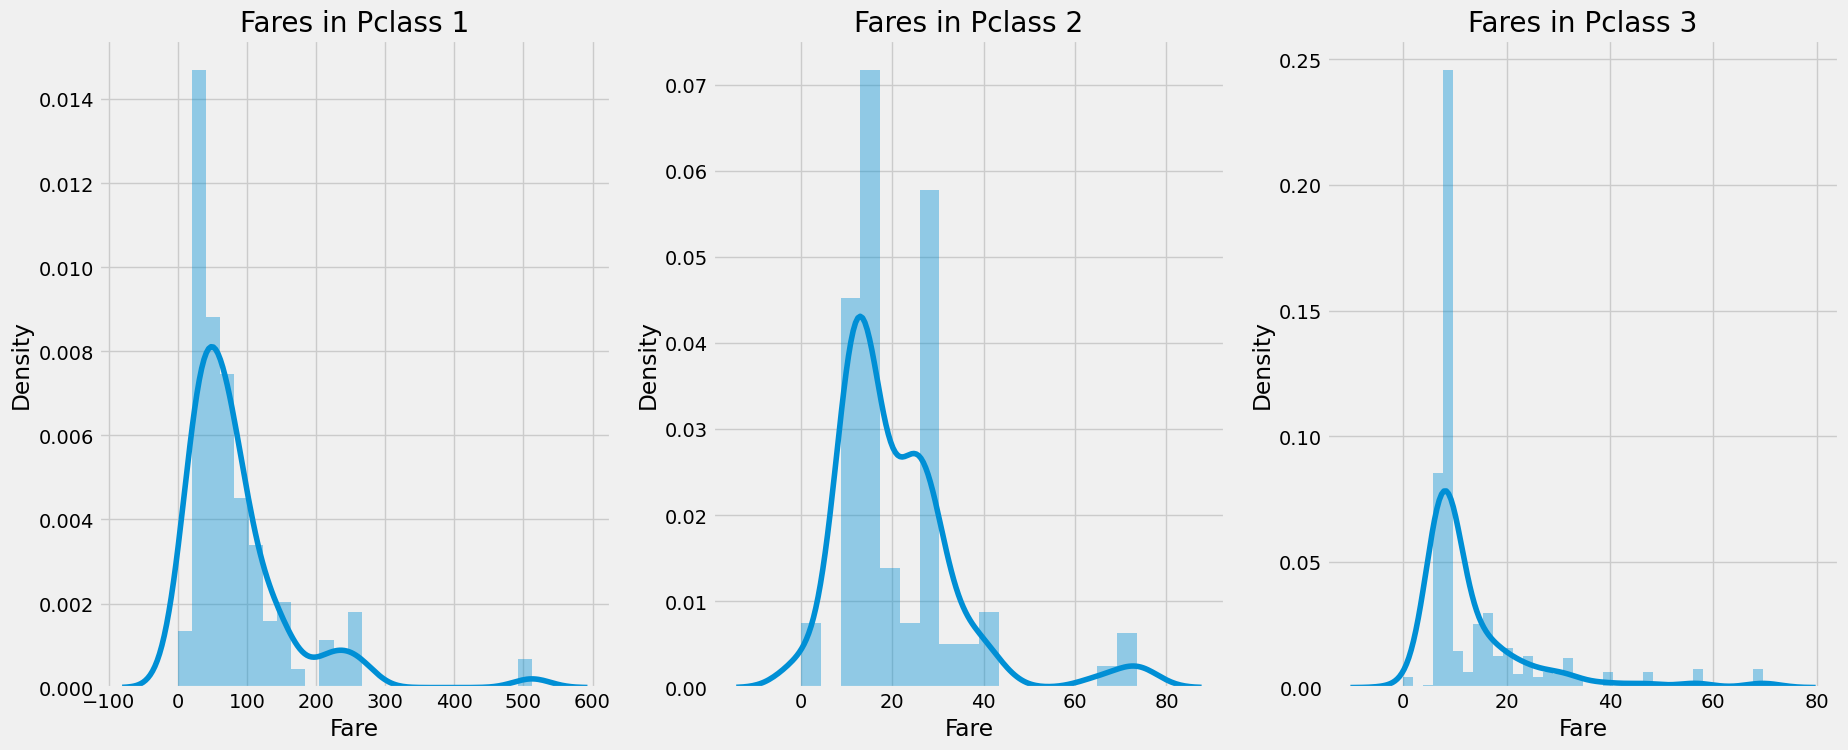

In [363]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### Correlation Between the Features


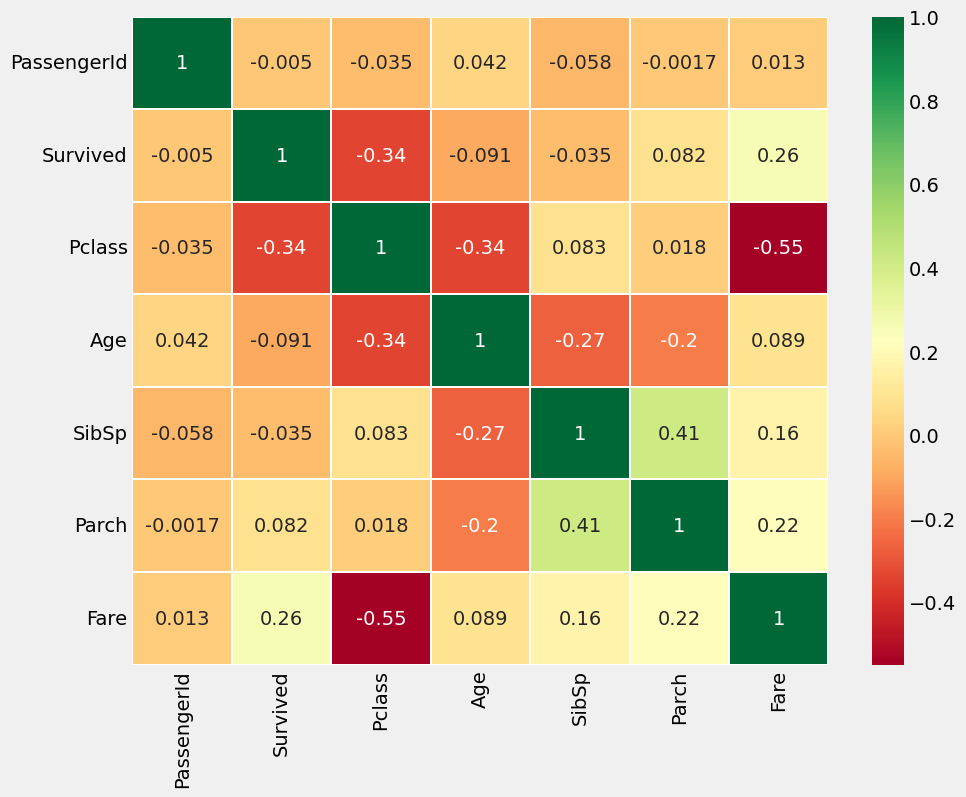

In [364]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

값의 절댓값이 클수록  
두 특징 모두 매우 유사한 정보를 포함하고 있으며 정보의 분산이 매우 적거나 전혀 없다는 것을 의미  
거의 동일한 정보를 포함하고 있으므로 다중공선성(MultiColinary)라고 함  
  
중복 기능을 제거하려 노력해야함  
  
위의 히트맵을 보면 그다지 상관관계가 없다

## Part2: Feature Engineering and Data Cleaning

모든 특징이 중요할 필요는 없다  
제거해야 할 중복된 특징들이 많이 있을 수 있다.  
다른 특징들을 관찰하거나 추출함으로써 새로운 특징들을 얻거나 추가할 수 있다

### Age_band  
Age는 연속형 변수  
Binning / Normalization 으로 범주형값으로 변환해야한다  
  
max age = 80  
0~80 into 5 bins -> bin size 16


In [365]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16)&(data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32)&(data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48)&(data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [366]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


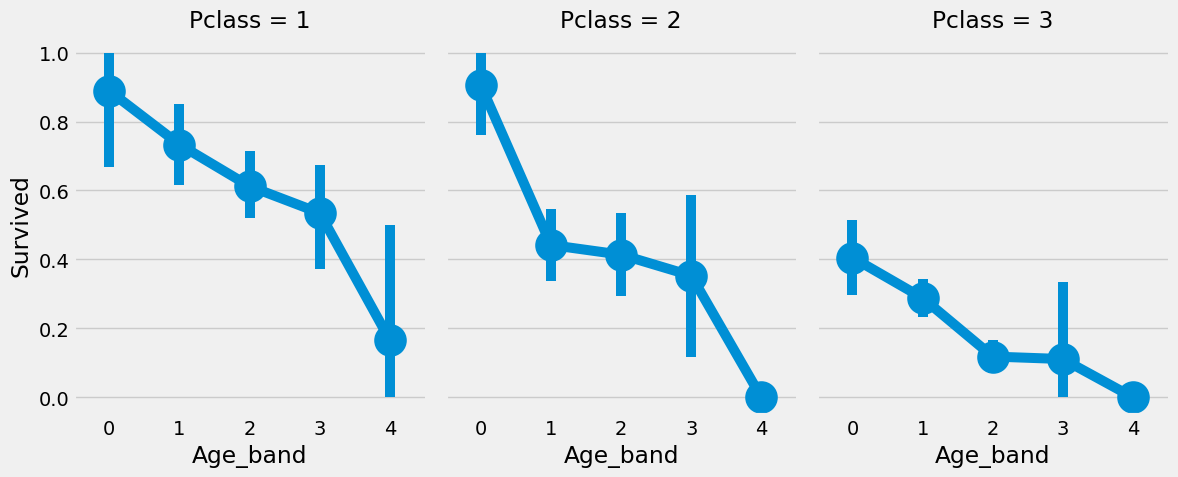

In [367]:
g = sns.FacetGrid(data, col = 'Pclass', height=5, aspect=.8)
g.map_dataframe(sns.pointplot, x = 'Age_band',y = 'Survived')
#sns.pointplot(data=data, x = 'Age_band',
#              y = 'Survived', hue = 'Pclass')

나이가 들수록 생존율이 낮아지는 것은 pclass와 무관하다

###Family_Size and Alone

"Family_size", "Alone" 을 만들 것이다  
 생존율이 승객의 가족 크기와 관련있는지 확인할 수 있도록

Text(0.5, 1.0, 'Alone vs Survived')

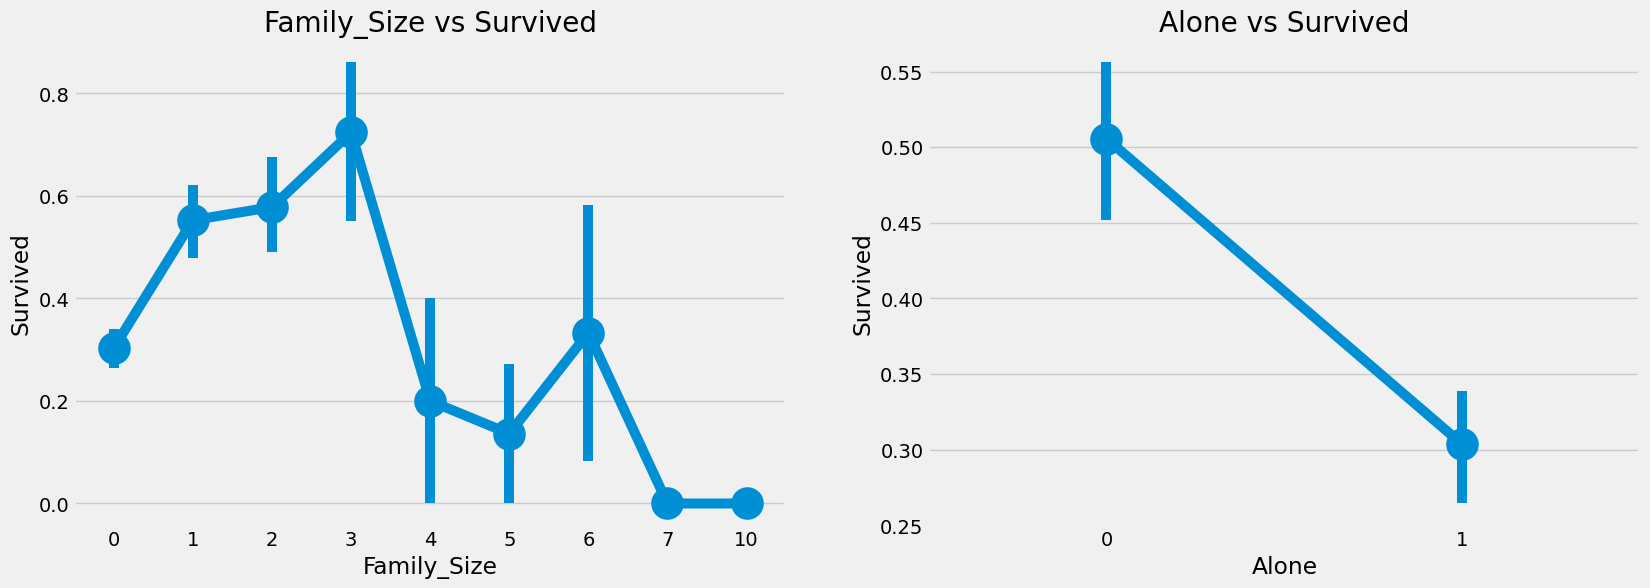

In [368]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x = 'Family_Size',y = 'Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x = 'Alone',y = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

혼자 탑승한 경우 생존율이 매우 낮다  
가족 수가 4 이상일 경우 생존율이 감소한다  

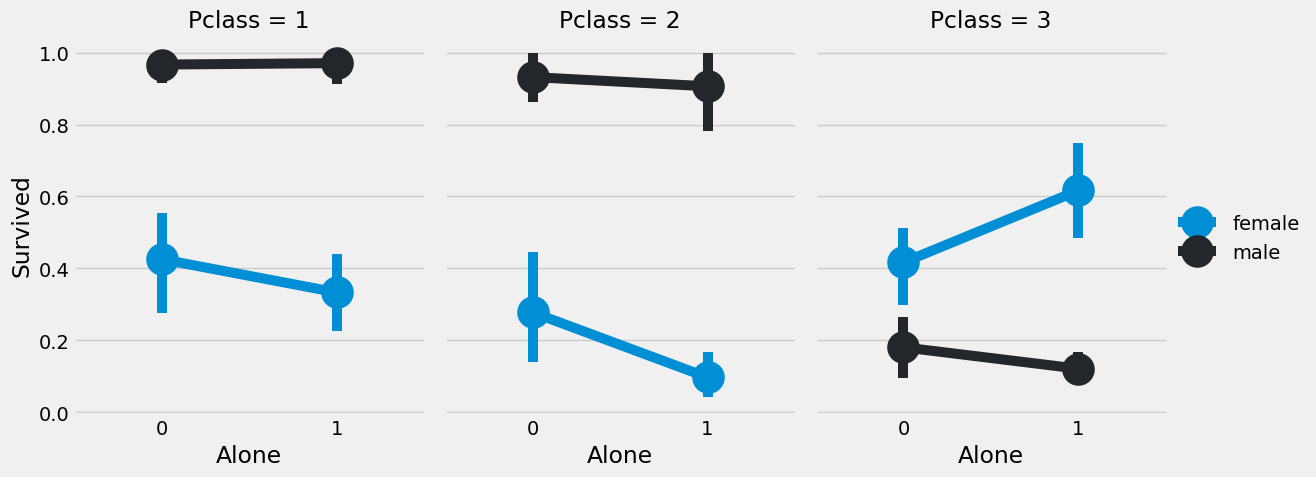

In [369]:
g2 = sns.FacetGrid(data, col = 'Pclass', height= 5, aspect=.8)
g2.map_dataframe(sns.pointplot,x = 'Alone',y = 'Survived',hue = 'Sex')
g2.add_legend()

pclass 3의 여성을 제외하고 Sex나 Pclass와 상관없이 혼자 있는 것이 유해하다.

###Fare_Range

Fare도 연속형 변수임으로 순서값으로 변환 -> pd.qcut

In [370]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 증가할수록 생존율이 높아진다  
Fare_Range값을 그대로 전달할 수 없다.  
Age_Band에서 했던 것과 같은 싱글톤값으로 변환해야한다

In [371]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']> 14.454)&(data['Fare']<31), 'Fare_cat'] = 2
data.loc[data['Fare']>31, 'Fare_cat'] = 3

<Axes: xlabel='Fare_cat', ylabel='Survived'>

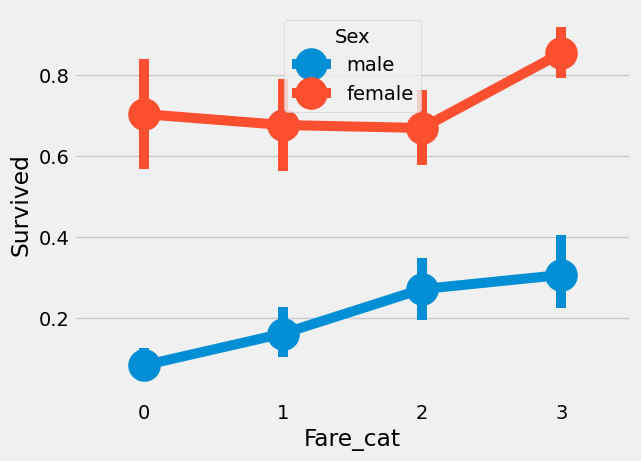

In [372]:
sns.pointplot(data = data, x = 'Fare_cat', y = 'Survived', hue = 'Sex')

Fare가 증가할수록 생존율이 높아진다  

### Converting String Values into Numeric

머신러닝모델은 문자열을 학습하지 못한다  
Sex, Embarked, etc 를 수치형 변수로 변환

In [373]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace = True)

###Dropping UnNeeded Features
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> Age_band

Ticket--> 임의 문자열로 분류할 수 없다  
Fare--> Fare_cat

Cabin--> NaN값이 많고 여러개의 cabin을 가지고 있어 쓸모없음

Fare_Range--> fare_cat

PassengerId--> 분류할 수 없다

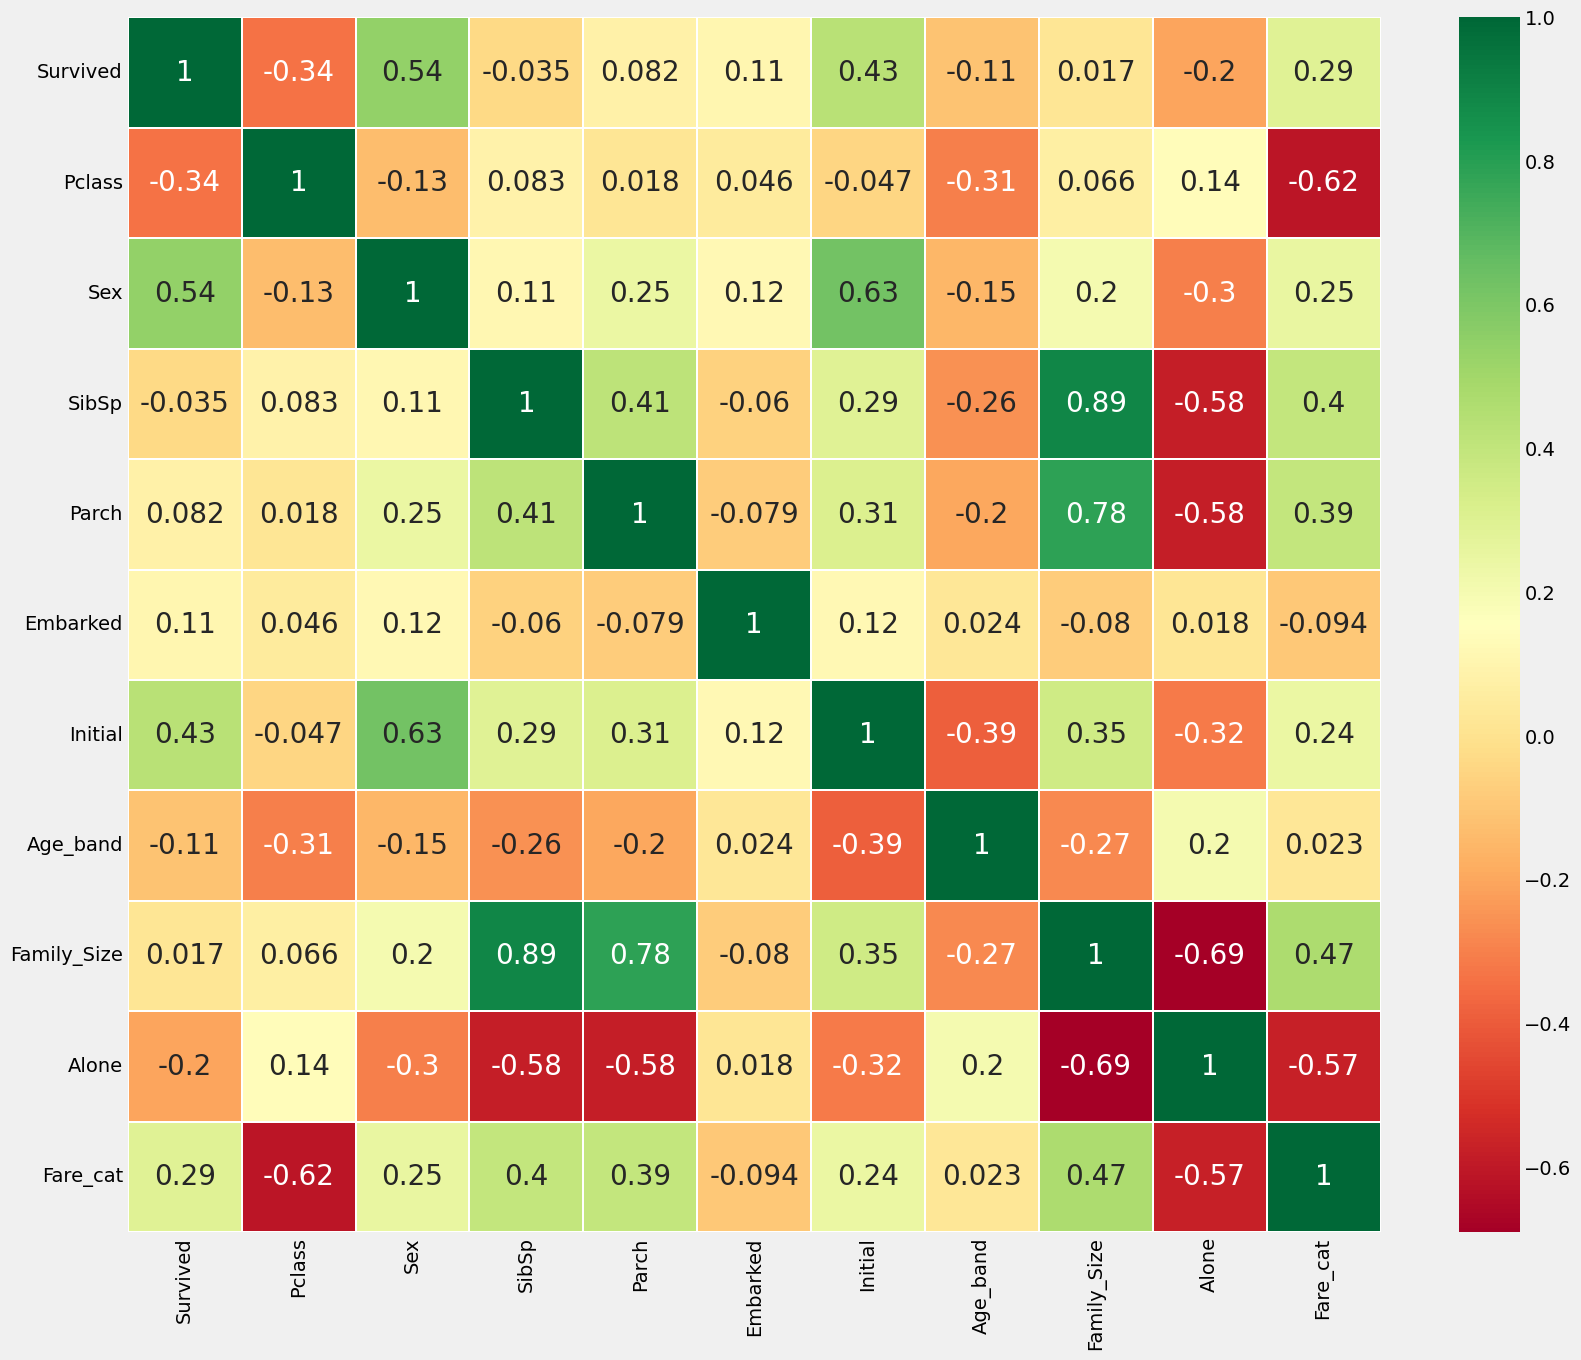

In [374]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part3: Predictive Modeling


1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [376]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [377]:
train_X.dtypes

Pclass         int64
Sex            int64
SibSp          int64
Parch          int64
Embarked       int64
Initial        int64
Age_band       int64
Family_Size    int64
Alone          int64
Fare_cat       int64
dtype: object

#### Radial Support Vector Machines (rbf-SVM)

In [378]:
model = svm.SVC(kernel='rbf', C=1.0, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [379]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma= 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


#### Logistic Regression

In [380]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


#### Decision Tree

In [381]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is  0.8059701492537313


#### K-Nearest Neighbours(KNN)

In [382]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy for KNN is  0.8134328358208955


n_neighbors 에 따라 KNN 모델의 정확도가 바뀐다.  

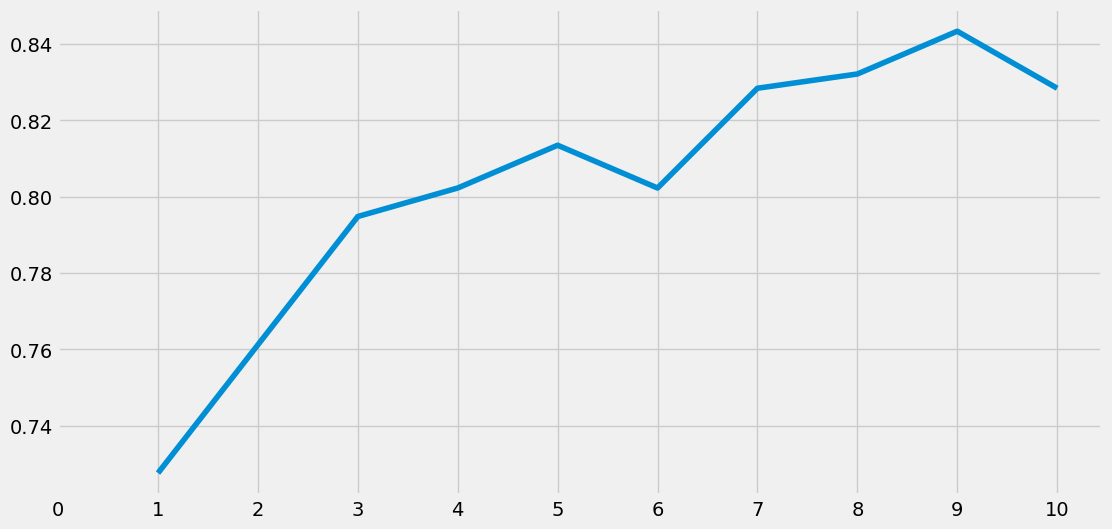

Accuracies for different values of n are: [0.72761194 0.76119403 0.79477612 0.80223881 0.81343284 0.80223881
 0.82835821 0.83208955 0.84328358 0.82835821] with the max value as  0.8432835820895522


In [383]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,
          'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [384]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for Naive Bayes is ', metrics.accuracy_score(prediction6, test_Y))

Accuracy for Naive Bayes is  0.8134328358208955


#### Random Forests

In [385]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

Accuracy for Random Forests is  0.8134328358208955


새로운 test데이터 세트에 대해 같은 정확도가 나올 수 없다 -> 분류기가 자신을 훈련시키는데 사용할 모든 인스턴스를 결정할 수 없기 때문  
train, test 이 변함에 따라 정확도도 변함  
이를 극복하고 일반화된 모델을 얻기 위해 교차검증을 사용


### Cross Validation
  
교차검증을 통해 일반화된 모델을 달성할 수 있다

In [386]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits = 10, shuffle=True, random_state=22)
xyz=[]
accuracy = []
std=[]
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X,Y, cv = kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.812634,0.040130
Decision Tree,0.812597,0.046214
Naive Bayes,0.795843,0.054861
Random Forest,0.822734,0.054955


<Axes: >

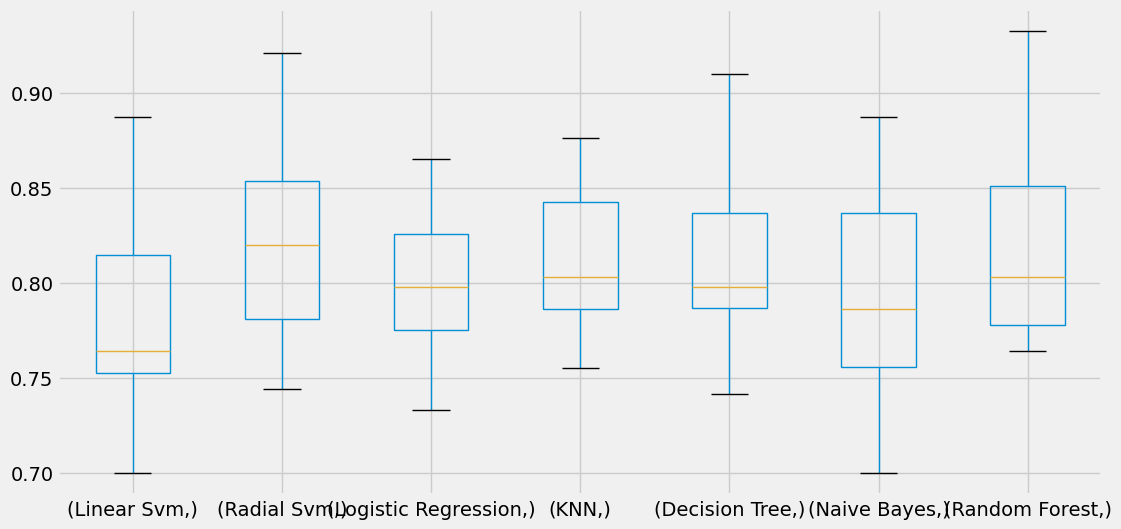

In [387]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

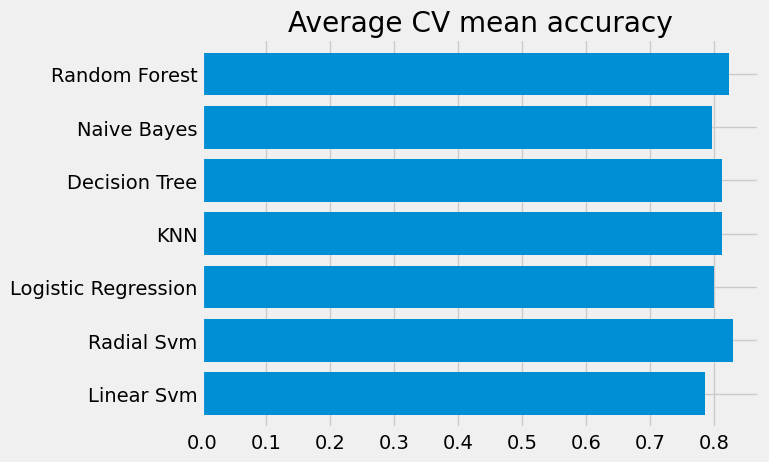

In [388]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV mean accuracy')
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

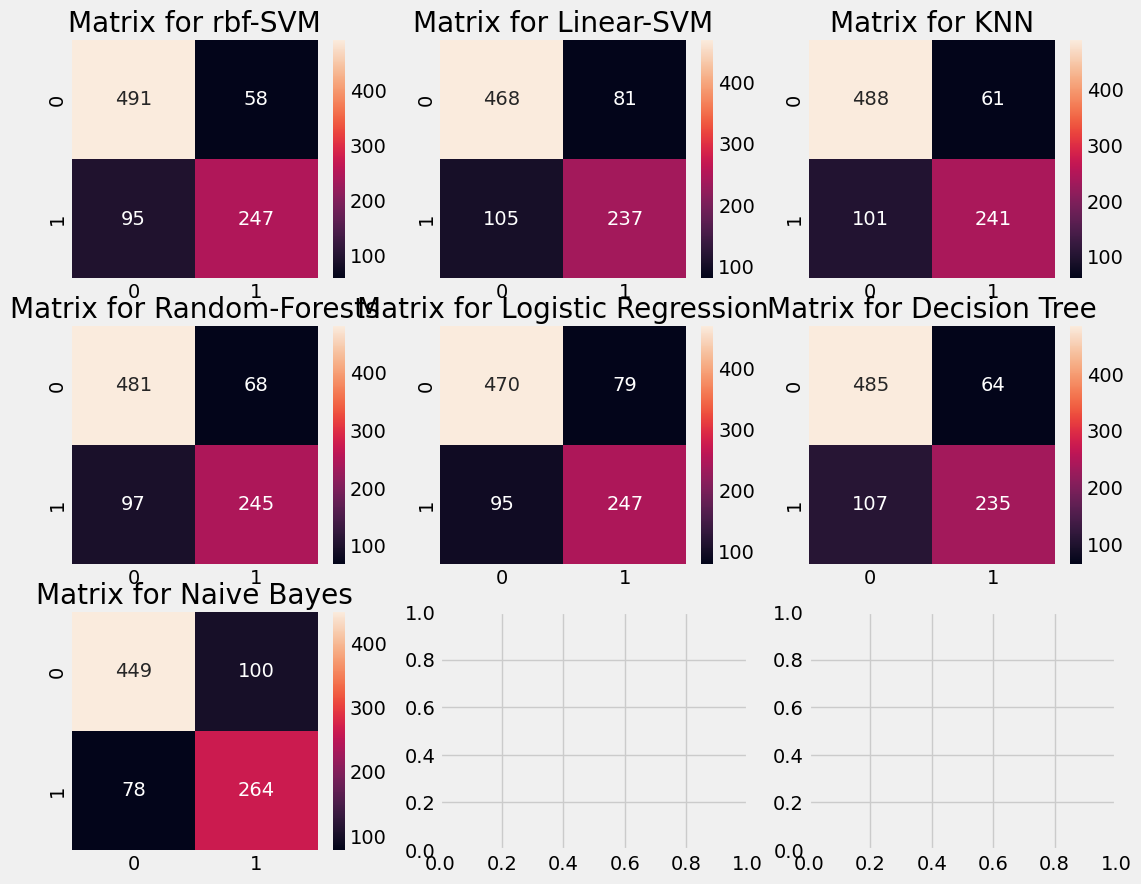

In [389]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Hyper Parameter tuning

몇가지 기본 매개변수값을 조정하거나 변경하여 더 나은 모델을 얻을 수 있다.  
-> 분류기에 따라 다른 매개변수를 조정하여 알고리즘의 학습 속도를 변경  
= 하이퍼 파라미터 조정  
  
SVM과 RandomForest에 대한 하이퍼파라미터를 조정 할 것이다

#### SVM

In [390]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid= hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}


#### Random Forest

In [391]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid= hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204381394764925
{'n_estimators': 900}


##Ensembling

다양한 단순 모형들을 조합해 하나의 강력한 모형을 만드는 것  

1)Voting Classifier

2)Bagging

3)Boosting.

#### Voting Classifier

In [392]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                    voting = 'soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8249188514357053


#### Bagging

Bagged KNN  
  
배깅은 분산이 높은 모델에서 가장 잘 작동  
Decision Tree / Random Forests  
n_neighbors가 작은 KNN

In [393]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3),random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8160424469413232


Bagged Decision Tree

In [394]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227715355805243


### Boosting  
  
분류기의 순차적 학습을 이용하는 앙상블 기법  
약한 모델을 단계적으로 향상시키는 것  
  
모델이 전체 데이터세트에 대해 훈련한 후  
어떤 인스턴스는 옳게 얻고 어떤 것은 틀리게 된다  
다음 반복에서 잘 못 예측된 인스턴스에 더 집중하거나 많은 비중을 둘 것  
  
    
-> 잘못 예측된 인스턴스를 정확하게 예측하려 할 것  
이 과정을 반복하고 정확도에 대한 한계에 도달할 때까지 새로운 분류기가 추가된다

#### AdaBoost
약한 분류기 = Decision Tree

In [395]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate= 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting
약한 분류기 = Decision Tree

In [396]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8160299625468165


#### XGBoost


In [397]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8204993757802747


#### Hyper Parameter Tuning for AdaBoost

In [399]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8260184545853996
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


#### Confusion Matrix for the Best Model

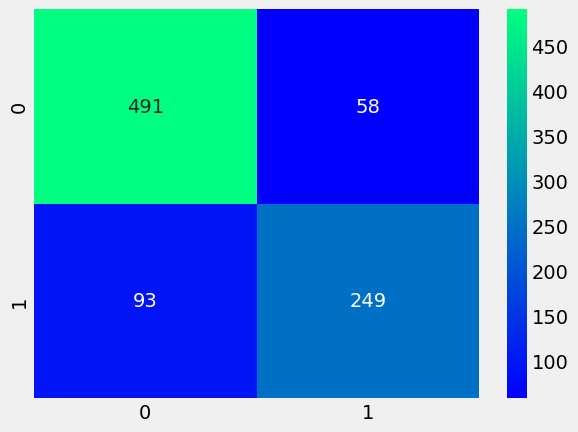

In [400]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

##Feature Importance

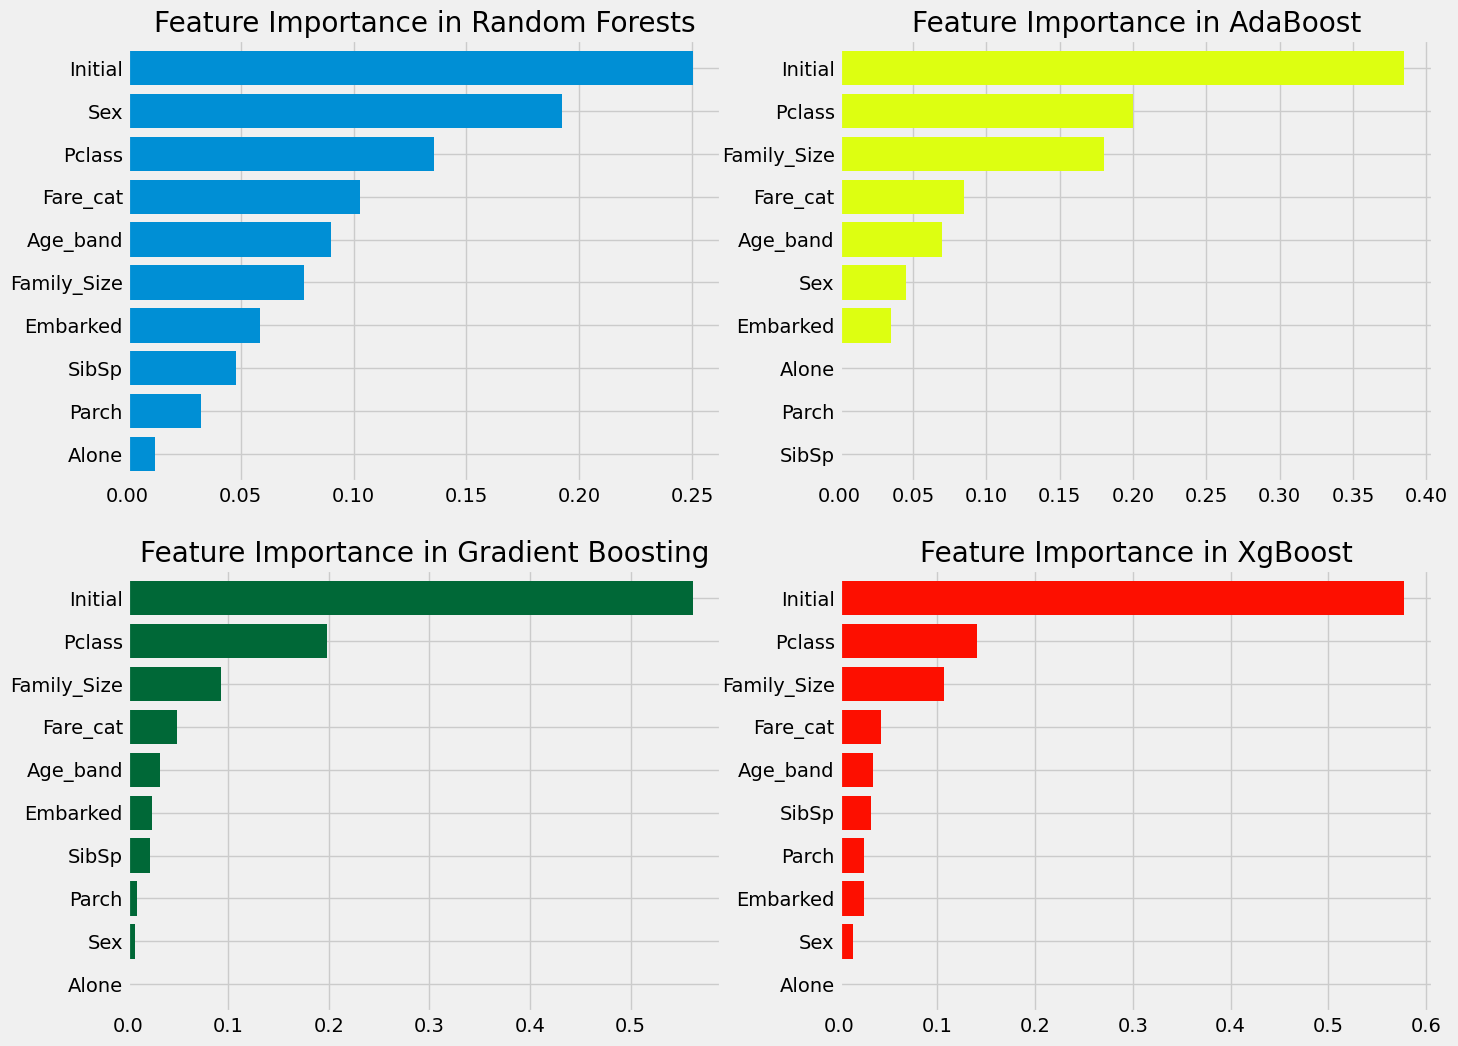

In [401]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

1. 일반적인 중요 기능은 Initial, Fare_cat, Pclass, Family_Size 이다  
2. Sex는 Random Forests에서만 중요하다, Initial이 상위 기능이다. -> 양의 상관관계가 있어 둘 다 성별을 나타낸다.
